In [1]:
import  torchvision,torch
import  torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
trainset = torchvision.datasets.MNIST(root='./mnist/',train=True,
                                      download=True, transform= transforms.ToTensor())

In [3]:
trainloader = DataLoader(trainset, batch_size=4,shuffle=True, num_workers=4)

In [ ]:
for step, (x, y) in enumerate(trainloader):
    b_x = x.shape
    b_y = y.shape
    print('Step: ', step, '| train_data的维度' ,b_x,'| train_target的维度',b_y)

In [4]:

import numpy as np

# functions to show an image
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

#def imshow(img):
 #   img = img / 2 + 0.5     # unnormalize
  #  npimg = img.numpy()
   # plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.show()


# get some random training images
print('01',trainloader,'\n')
dataiter = iter(trainloader)
print('02',dataiter)



images, labels = dataiter.next()
print(images.shape,'\n')
print(labels)

# show images
#imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(50)))

01 <torch.utils.data.dataloader.DataLoader object at 0x7f6ad380d650> 

02 <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6ad382f810>
torch.Size([4, 1, 28, 28]) 

tensor([8, 7, 7, 2])


(3, 32, 122)


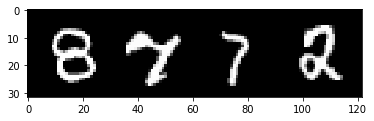

In [5]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(npimg.transpose((1,2,0)))
    #plt.imshow(npimg)
   # plt.show()
    
imshow(torchvision.utils.make_grid(images))


In [6]:
testset = torchvision.datasets.MNIST(root='./mnist/',train=False,
                                      download=True, transform= transforms.ToTensor())

testloader = DataLoader(testset, batch_size=4,shuffle=True, num_workers=4)


In [7]:
import torch.nn as nn
import torch.nn.functional as F

#device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
device = torch.device("cpu")
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print(device)
net = Net().to(device)

cpu


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
import time

In [10]:
start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
       # print(outputs.shape,'\n')
       # print(labels.shape,'\n')
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

            
end = time.time()
print('Finished Training')
print('training time is %6.3f' % (end - start))

[1,  2000] loss: 1.712
[1,  4000] loss: 0.351
[1,  6000] loss: 0.179
[1,  8000] loss: 0.145
[1, 10000] loss: 0.133
[1, 12000] loss: 0.104
[1, 14000] loss: 0.116
[2,  2000] loss: 0.085
[2,  4000] loss: 0.084
[2,  6000] loss: 0.074
[2,  8000] loss: 0.076
[2, 10000] loss: 0.063
[2, 12000] loss: 0.071
[2, 14000] loss: 0.058
Finished Training
training time is 112.592


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
a = torch.cuda.is_available()
print(a)

ngpu= 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)
print(torch.cuda.get_device_name(0))
print(torch.rand(3,3).cuda()) 